# Churn Prediction

Basic info about project - to be added

**Customer churn** refers to the phenomenon where customers stop doing business with a company or stop using a service. It's a critical metric for businesses, especially those in subscription-based industries, as it directly impacts revenue and growth potential.

Churn rate is calculated with the following formula:



$$ \text{Churn Rate} = \frac{\text{Lost Customers}}{\text{Total Customers at the start period}} \times 100 $$


# Data Exploration and Data Cleaning

In [1]:
!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [2]:
#load dataset
data = pd.read_csv("customer_churn_data.csv")
#Explore presented data
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
5,CUST0005,Female,0,Yes,No,35,Yes,No,DSL,No,...,No,Yes,Yes,Yes,One year,No,Credit card,116.96,4093.60,No
6,CUST0006,Male,0,Yes,No,17,No,No phone service,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer,91.53,1556.01,Yes
7,CUST0007,Male,0,Yes,Yes,18,Yes,No,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,26.52,477.36,Yes
8,CUST0008,Male,0,No,No,27,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,67.77,1829.79,Yes
9,CUST0009,Female,0,No,No,15,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,86.45,1296.75,Yes


In [3]:
#exlore columns
columnnames=data.columns
print(columnnames)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Mean normalization

It is important to normalize mean values in order to run effective machine learning models later on.

A `Min-Max Scaling` is typically done via the foloowing equation:

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset.


Now we would like to bring your attention to the following columns and their graphs:

"tenure" - displays number of months the customer has stayed with the company,

"MonthlyCharges" - displays the amount charged to the customer monthly,

"TotalCharges" - The total amount charged to the customer.


In [4]:
#from matplotlib import pyplot as plt
#_df_1['tenure'].plot(kind='hist', bins=20, title='tenure')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
#from matplotlib import pyplot as plt
#_df_2['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
#from matplotlib import pyplot as plt
_#df_3['TotalCharges'].plot(kind='hist', bins=20, title='TotalCharges')
#plt.gca().spines[['top', 'right',]].set_visible(False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
5,CUST0005,Female,0,Yes,No,35,Yes,No,DSL,No,...,No,Yes,Yes,Yes,One year,No,Credit card,116.96,4093.60,No
6,CUST0006,Male,0,Yes,No,17,No,No phone service,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer,91.53,1556.01,Yes
7,CUST0007,Male,0,Yes,Yes,18,Yes,No,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,26.52,477.36,Yes
8,CUST0008,Male,0,No,No,27,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,67.77,1829.79,Yes
9,CUST0009,Female,0,No,No,15,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,86.45,1296.75,Yes


All three of these columns presented above have a big range of numbers, therefore they are going to be normilized in order to run better on machine learning algorithm.

In [7]:
# "tenure" normalization
data['tenure']=(data['tenure']-data['tenure'].mean())/data['tenure'].std()

# "MonthlyCharges" normalization
data['MonthlyCharges']=(data['MonthlyCharges']-data['MonthlyCharges'].mean())/data['MonthlyCharges'].std()

#"TotalCharges" normalization
data['TotalCharges']=(data['TotalCharges']-data['TotalCharges'].mean())/data['TotalCharges'].std()

#Represent dataset with reduced mean values
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,-0.647985,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,-0.705018,-0.743586,No
1,CUST0001,Female,0,Yes,No,0.308510,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,1.060324,0.923178,Yes
2,CUST0002,Male,1,No,No,0.691108,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,0.943329,1.254971,Yes
3,CUST0003,Male,1,No,No,1.695428,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,1.083931,2.477750,No
4,CUST0004,Male,1,No,No,-0.552335,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,-0.622740,-0.660367,Yes
5,CUST0005,Female,0,Yes,No,-0.074088,Yes,No,DSL,No,...,No,Yes,Yes,Yes,One year,No,Credit card,1.624817,0.799357,No
6,CUST0006,Male,0,Yes,No,-0.934933,No,No phone service,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer,0.741972,-0.529211,Yes
7,CUST0007,Male,0,Yes,Yes,-0.887109,Yes,No,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,-1.514958,-1.093944,Yes
8,CUST0008,Male,0,No,No,-0.456686,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,-0.082896,-0.385872,Yes
9,CUST0009,Female,0,No,No,-1.030583,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,0.565611,-0.664948,Yes




```
# This is formatted as code
```

Label Encoding:

Label encoding serves the same purpose as mean normalization, which is present data in numeric values to algorithm to run it efficiently.  
In the code below, we are going to map binary values to 1 and 0 respectively.

In [8]:
#data encoding switch yes/no values to 1/0.
data['Churn']=data['Churn'].apply(lambda x:1 if x=='Yes' else 0)
data['gender']=data['gender'].apply(lambda x:1 if x=='Female' else 0) #"Female" value has been mapped to 1 and "male" value to 0
data['Partner']=data['Partner'].apply(lambda x:1 if x=='Yes' else 0)
data['Dependents']=data['Dependents'].apply(lambda x:1 if x=='Yes' else 0)
data['PhoneService']=data['PhoneService'].apply(lambda x:1 if x=='Yes' else 0)
data['MultipleLines']=data['MultipleLines'].apply(lambda x:1 if x=='Yes' else 0)
data['OnlineSecurity']=data['OnlineSecurity'].apply(lambda x:1 if x=='Yes' else 0)
data['OnlineBackup']=data['OnlineBackup'].apply(lambda x:1 if x=='Yes' else 0)
data['DeviceProtection']=data['DeviceProtection'].apply(lambda x:1 if x=='Yes' else 0)
data['TechSupport']=data['TechSupport'].apply(lambda x:1 if x=='Yes' else 0)
data['StreamingTV']=data['StreamingTV'].apply(lambda x:1 if x=='Yes' else 0)
data['StreamingMovies']=data['StreamingMovies'].apply(lambda x:1 if x=='Yes' else 0)
data['PaperlessBilling']=data['PaperlessBilling'].apply(lambda x:1 if x=='Yes' else 0)
data['SeniorCitizen']=data['SeniorCitizen'].apply(lambda x:1 if x=='Yes' else 0)


In [9]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,0,0,0,1,-0.647985,0,0,No,0,...,0,0,0,0,Month-to-month,1,Bank transfer,-0.705018,-0.743586,0
1,CUST0001,1,0,1,0,0.308510,0,0,DSL,1,...,1,0,1,0,Month-to-month,0,Mailed check,1.060324,0.923178,1
2,CUST0002,0,0,0,0,0.691108,1,0,DSL,0,...,1,1,0,0,One year,0,Electronic check,0.943329,1.254971,1
3,CUST0003,0,0,0,0,1.695428,1,1,DSL,1,...,1,0,0,0,Month-to-month,0,Credit card,1.083931,2.477750,0
4,CUST0004,0,0,0,0,-0.552335,1,1,DSL,0,...,0,1,0,1,Month-to-month,0,Electronic check,-0.622740,-0.660367,1
5,CUST0005,1,0,1,0,-0.074088,1,0,DSL,0,...,0,1,1,1,One year,0,Credit card,1.624817,0.799357,0
6,CUST0006,0,0,1,0,-0.934933,0,0,DSL,0,...,0,1,0,1,One year,1,Bank transfer,0.741972,-0.529211,1
7,CUST0007,0,0,1,1,-0.887109,1,0,DSL,0,...,1,1,0,1,One year,0,Mailed check,-1.514958,-1.093944,1
8,CUST0008,0,0,0,0,-0.456686,0,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,-0.082896,-0.385872,1
9,CUST0009,1,0,0,0,-1.030583,0,0,No,0,...,0,0,0,0,One year,0,Electronic check,0.565611,-0.664948,1


One hot encoding

One hot encoding is another method to prepare data for machine learning analysis. For example, "InternetServives" column uses multiple possible answers(NO, DSL, Fiber optic), in that we are going to drop the "InternetServices" colum, and create 3 new columns "NO", "DSL", "Fiber optic" that will be tied up to binary 1 and 0 values, based whether or not customer is using one of those internet services.

In [10]:
data['InternetService'].value_counts()

InternetService
No             2029
DSL            1936
Fiber optic    1915
Name: count, dtype: int64

In [11]:
for x in data['InternetService'].value_counts().keys():
      data[x]=data['InternetService'].apply(lambda d: 1 if d==x else 0)
data.drop(columns=['InternetService'], inplace=True)
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No,DSL,Fiber optic
0,CUST0000,0,0,0,1,-0.647985,0,0,0,0,...,0,Month-to-month,1,Bank transfer,-0.705018,-0.743586,0,1,0,0
1,CUST0001,1,0,1,0,0.308510,0,0,1,0,...,0,Month-to-month,0,Mailed check,1.060324,0.923178,1,0,1,0
2,CUST0002,0,0,0,0,0.691108,1,0,0,1,...,0,One year,0,Electronic check,0.943329,1.254971,1,0,1,0
3,CUST0003,0,0,0,0,1.695428,1,1,1,0,...,0,Month-to-month,0,Credit card,1.083931,2.477750,0,0,1,0
4,CUST0004,0,0,0,0,-0.552335,1,1,0,0,...,1,Month-to-month,0,Electronic check,-0.622740,-0.660367,1,0,1,0
5,CUST0005,1,0,1,0,-0.074088,1,0,0,0,...,1,One year,0,Credit card,1.624817,0.799357,0,0,1,0
6,CUST0006,0,0,1,0,-0.934933,0,0,0,0,...,1,One year,1,Bank transfer,0.741972,-0.529211,1,0,1,0
7,CUST0007,0,0,1,1,-0.887109,1,0,0,1,...,1,One year,0,Mailed check,-1.514958,-1.093944,1,0,1,0
8,CUST0008,0,0,0,0,-0.456686,0,0,1,0,...,0,One year,0,Mailed check,-0.082896,-0.385872,1,0,1,0
9,CUST0009,1,0,0,0,-1.030583,0,0,0,0,...,0,One year,0,Electronic check,0.565611,-0.664948,1,1,0,0


In [12]:
#We need to do the same manipulation with "contract column that has three following answers (Month-to-month, One year, Two year) those answers will be created as separate columns to store binary values.
for x in data['Contract'].value_counts().keys():
    data[x]=data['Contract'].apply(lambda d: 1 if d==x else 0)

#drop the "Contract" column
data.drop(columns=['Contract'], inplace=True)

In [13]:
#Applying one hot encoding to payment method column as well "PaymentMethod"
for x in data['PaymentMethod'].value_counts().keys():
    data[x]=data['PaymentMethod'].apply(lambda d: 1 if d==x else 0)

#dropping "PaymentMethod" column
data.drop(columns=['PaymentMethod'], inplace=True)

#present updated data
data.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,No,DSL,Fiber optic,Month-to-month,One year,Two year,Credit card,Electronic check,Mailed check,Bank transfer
0,CUST0000,0,0,0,1,-0.647985,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,CUST0001,1,0,1,0,0.308510,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,CUST0002,0,0,0,0,0.691108,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,CUST0003,0,0,0,0,1.695428,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0
4,CUST0004,0,0,0,0,-0.552335,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
5,CUST0005,1,0,1,0,-0.074088,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
6,CUST0006,0,0,1,0,-0.934933,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
7,CUST0007,0,0,1,1,-0.887109,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
8,CUST0008,0,0,0,0,-0.456686,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
9,CUST0009,1,0,0,0,-1.030583,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


All of the data has been conversed into numeric values, and mean values of "tenure", "TotalCharges" and "MonthlyCharges" has been normalized to run efficiently.

In [14]:
#create new formatted dataset
data.to_csv('formated_customer_churn_data.csv')

In [15]:
#Following lide downloads a copy of newly created dataset from cell above (formated_customer_churn_data.csv) on your local machine for back up purposes. If you would like to store it locally, please remote '#' from the following code line:

#files.download('formated_customer_churn_data.csv')

# Feature selection and Corelation Matrix

In [16]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
data_path = 'customer_churn_data.csv'
df = pd.read_csv(data_path)

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

# Encode categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into training and testing sets
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<Figure size 2000x1000 with 0 Axes>

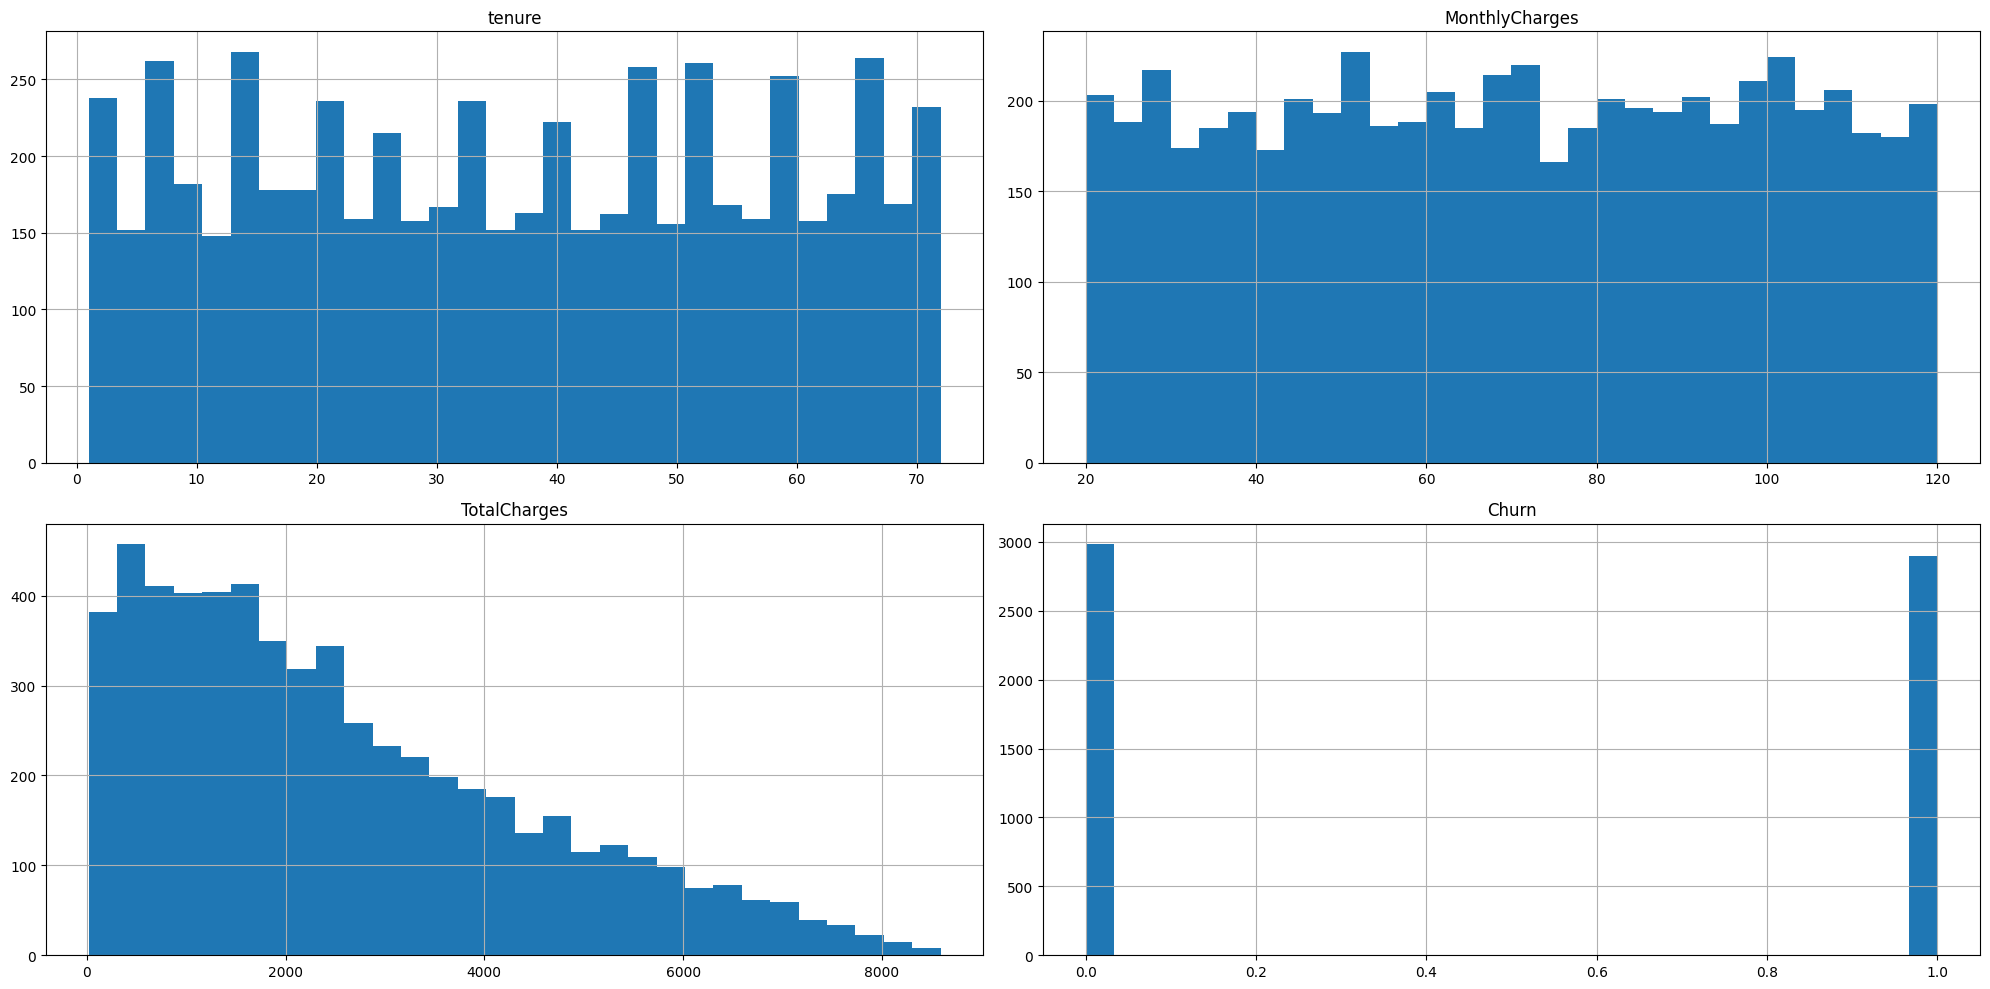

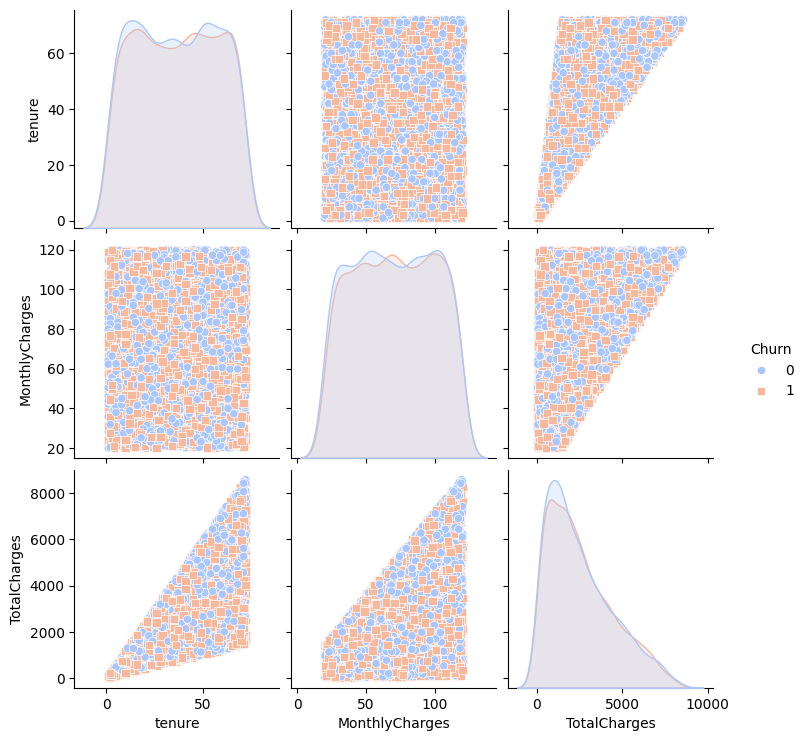

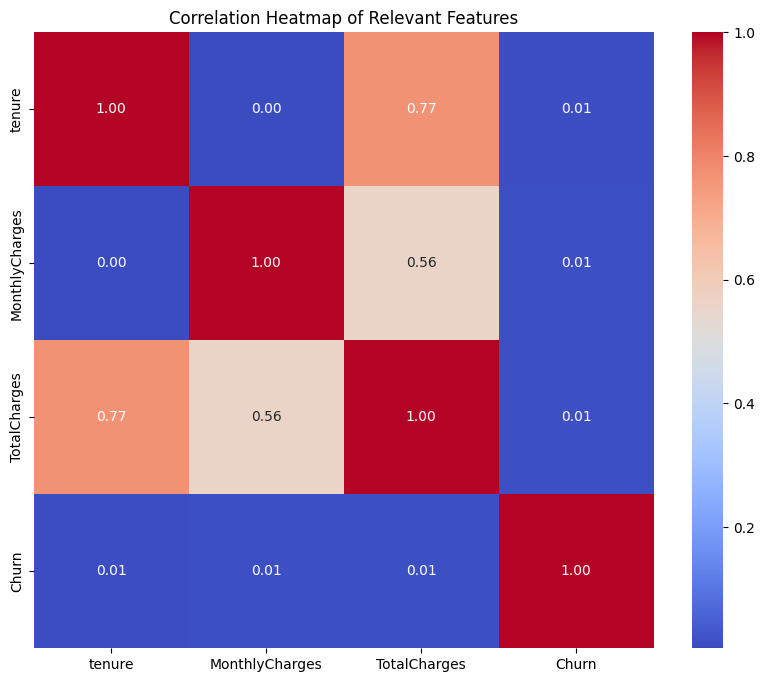

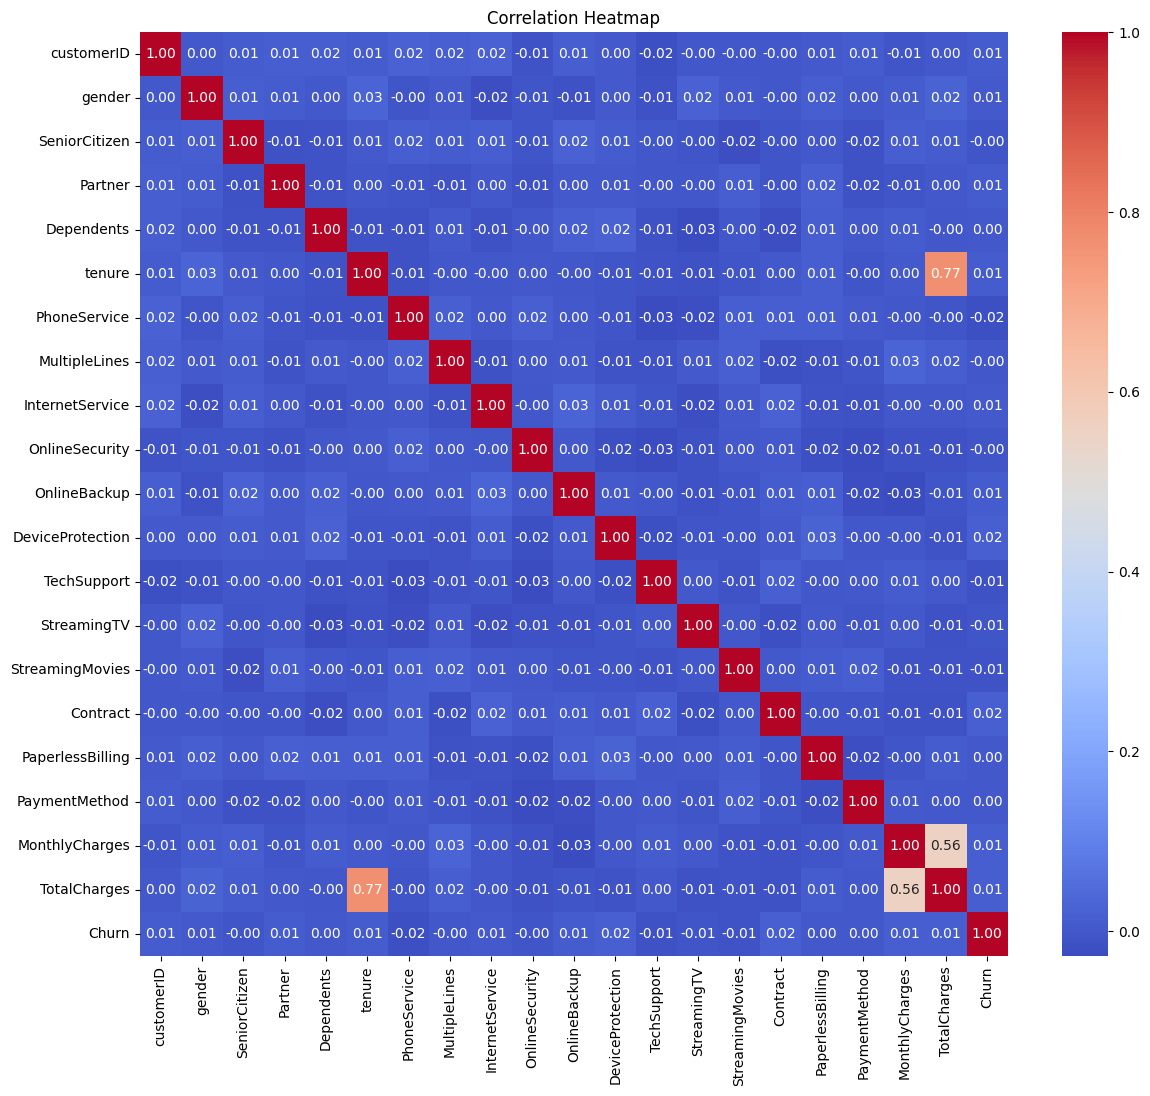

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relevant features for visualization
relevant_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Plot histograms for relevant features
plt.figure(figsize=(20, 10))
df[relevant_features].hist(bins=30, figsize=(20, 10), layout=(2, 2))
plt.tight_layout()
plt.show()

# Pairplot for relevant features with hue on 'Churn'
sns.pairplot(df[relevant_features], hue='Churn', palette="coolwarm", markers=["o", "s"])
plt.show()

# Correlation heatmap for relevant features
plt.figure(figsize=(10, 8))
sns.heatmap(df[relevant_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Relevant Features')
plt.show()


# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


1. Histograms of Relevant Features
Tenure:

The histogram shows a fairly even distribution across different tenure periods. This indicates a steady stream of customers joining and staying with the service.
However, there are slightly more customers with very short tenures, which could suggest that some new customers leave shortly after joining.
Monthly Charges:

The distribution of monthly charges is relatively uniform, with a slight concentration around the lower and higher ends. This suggests that customers are spread across different billing amounts without significant clustering at any particular price point.
Total Charges:

The histogram for total charges is right-skewed, indicating that most customers have accumulated relatively low total charges, which is consistent with having a large number of short-tenure customers.
Higher total charges are less common, which aligns with fewer long-tenure customers.
Churn:

The churn histogram shows a clear binary distribution. There are more non-churned customers than churned ones, indicating a reasonable retention rate.
2. Pairplot with Churn
Tenure vs. Churn:

The pairplot indicates that customers with shorter tenures are more likely to churn. This highlights the importance of focusing on early customer retention strategies.
Monthly Charges vs. Churn:

The pairplot shows no significant differentiation in monthly charges between churned and non-churned customers. This suggests that monthly charges alone are not a strong predictor of churn.
Total Charges vs. Churn:

Similar to monthly charges, total charges do not show a clear distinction between churned and non-churned customers. Churned customers are spread across different total charge levels.
3. Correlation Heatmap of Relevant Features
Tenure and Total Charges: A strong positive correlation (0.77) is evident, indicating that total charges naturally accumulate as customers stay longer.
Monthly Charges and Total Charges: A moderate positive correlation (0.56) exists, which makes sense because higher monthly charges contribute to higher total charges.
Churn: The correlations between churn and other features (tenure, monthly charges, and total charges) are weak, suggesting that churn is influenced by multiple factors and not dominated by any single financial metric.
Business Insights Based on Analysis
Early Retention Focus:

Customers with shorter tenures are more likely to churn. Enhancing the onboarding experience, providing early support, and offering initial incentives could help improve early retention rates.
Pricing Strategy:

Since monthly charges do not significantly differentiate churned from non-churned customers, pricing adjustments alone may not reduce churn. Focus on delivering value and ensuring customer satisfaction with the service provided at each price point.
Comprehensive Customer Engagement:

Engage customers throughout their lifecycle. For long-tenure customers, loyalty programs and long-term benefits could be more effective. For new customers, focus on immediate support and engagement.
Service Quality Emphasis:

Given that financial metrics alone do not strongly correlate with churn, investigating service quality, customer support interactions, and overall satisfaction might provide deeper insights. Regular feedback and service improvement initiatives could help retain customers.
Predictive Analytics:

Develop predictive models that incorporate a wider range of factors beyond financial metrics. Customer behavior, service usage patterns, and interaction history could enhance the accuracy of churn predictions.
Targeted Interventions:

Use data analytics to identify high-risk customers early and implement targeted interventions. Personalized communication, tailored offers, and proactive support could help in reducing churn.

Best Logistic Regression parameters: {'C': 0.01, 'solver': 'lbfgs'}
Best KNN parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Logistic Regression Metrics:
Accuracy: 0.48
Precision: 0.47
Recall: 0.34
F1 Score: 0.39

K-Nearest Neighbors Metrics:
Accuracy: 0.50
Precision: 0.51
Recall: 0.50
F1 Score: 0.50



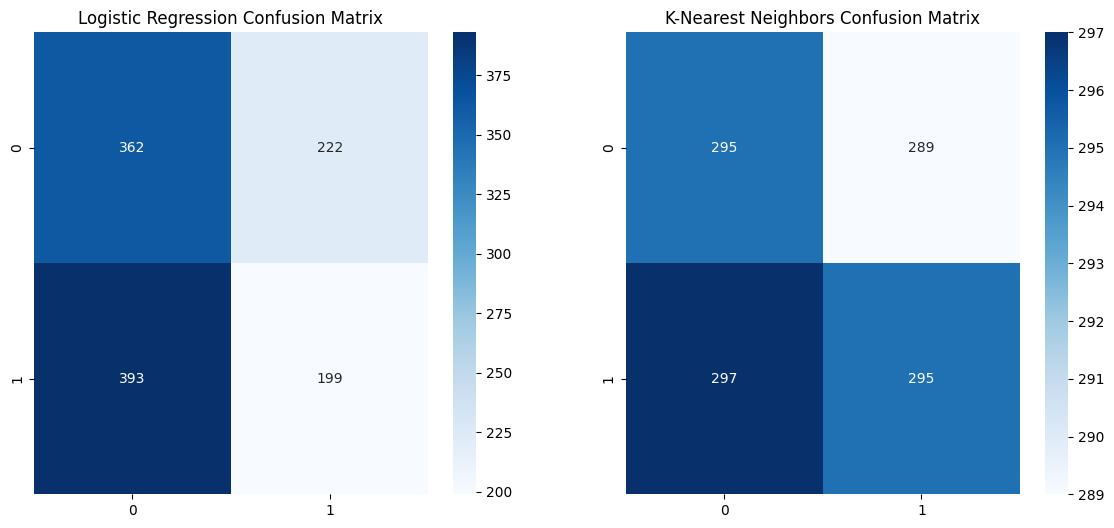

Logistic Regression Cross-Validation Accuracy: 0.49 (+/- 0.02)
K-Nearest Neighbors Cross-Validation Accuracy: 0.51 (+/- 0.02)


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv('customer_churn_data.csv')

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Feature engineering
df_encoded['Tenure_MonthlyCharges'] = df_encoded['tenure'] * df_encoded['MonthlyCharges']
df_encoded['Tenure_TotalCharges'] = df_encoded['tenure'] * df_encoded['TotalCharges']
df_encoded['MonthlyCharges_TotalCharges'] = df_encoded['MonthlyCharges'] * df_encoded['TotalCharges']

# Split data into training and testing sets
X = df_encoded.drop(['Churn', 'customerID'], axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to print evaluation metrics
def print_metrics(y_test, y_pred, model_name):
    print(f'{model_name} Metrics:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.2f}\n')

# Hyperparameter tuning for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)
best_log_reg = grid_log_reg.best_estimator_

# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

# Print best parameters
print("Best Logistic Regression parameters:", grid_log_reg.best_params_)
print("Best KNN parameters:", grid_knn.best_params_)

# Predictions
log_reg_pred = best_log_reg.predict(X_test)
knn_pred = best_knn.predict(X_test)

# Evaluate the best models
print_metrics(y_test, log_reg_pred, 'Logistic Regression')
print_metrics(y_test, knn_pred, 'K-Nearest Neighbors')

# Confusion Matrix
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')

plt.show()

# Cross-validation
log_reg_cv_scores = cross_val_score(best_log_reg, X, y, cv=5, scoring='accuracy')
print(f'Logistic Regression Cross-Validation Accuracy: {log_reg_cv_scores.mean():.2f} (+/- {log_reg_cv_scores.std() * 2:.2f})')

knn_cv_scores = cross_val_score(best_knn, X, y, cv=5, scoring='accuracy')
print(f'K-Nearest Neighbors Cross-Validation Accuracy: {knn_cv_scores.mean():.2f} (+/- {knn_cv_scores.std() * 2:.2f})')
